In [1]:
import qiskit
from qiskit import *
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor
%matplotlib inline

In [2]:
with open('tocken.txt', 'r') as file:
    myTocken = file.read().replace('\n', '')

In [3]:
IBMQ.save_account(myTocken,overwrite=True)

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Build a quantum circuit of 2 qubits by building 2 bit quantum register 

Build a classical circuit of 2 bits by building 2 bit classical register

classical registers here are essential to store measurements of the corresponding quantum bits

In [5]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

now we can build a circuit of them both

In [6]:
circuit = QuantumCircuit(qr,cr)

vizualize the circuit, with braket notations

In [7]:
circuit.draw()

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

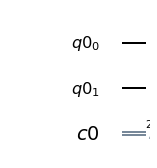

In [8]:
circuit.draw(output='mpl')

Next stage is to build the gates that can make use of this circuit

demonstrate quantum entanglement, Hadamard (H) gate

Apply Hadamard (H) gate on the first Qbit

In [9]:
circuit.h(qr[0])

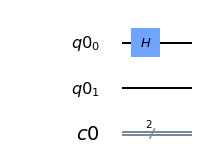

In [10]:
circuit.draw(output='mpl')

now, making a 2 qubit operation called 'controlled X' which can map to logical 'if' condition, so it can be the quantum version of 'if this then that'

control of this operation is 1st qubit
target of this operation is 2nd qubit

make a 2 qubit operation, controlled NOT, logical if operation, control is the first qbit, target of the operation is the second qbit

In [11]:
circuit.cx(qr[0],qr[1])

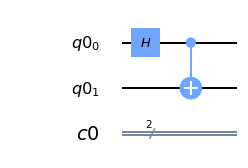

In [12]:
circuit.draw(output='mpl')

now there is is entanglement

Now, measure the qbits and store them in classical bits

In [13]:
circuit.measure(qr, cr)

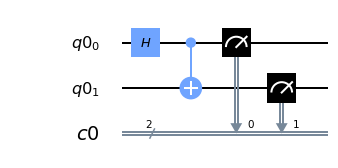

In [14]:
circuit.draw(output='mpl')

In [15]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q0_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c0_0: 0 ═══════════╩══╬═
                       ║ 
 c0_1: 0 ══════════════╩═

Now, run the circuit in a simulator

gonna use qasm simulator: quantum assembly language

now call the simulator

In [16]:
simulator = Aer.get_backend('qasm_simulator')

execute the circuit

In [17]:
execute(circuit, backend=simulator,shots=10000)

In [18]:
result = execute(circuit, backend=simulator).result()

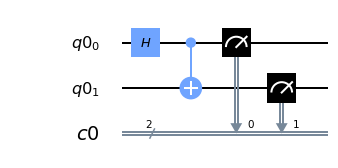

In [19]:
circuit.draw(output='mpl')

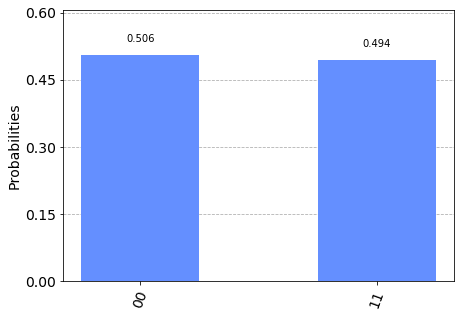

In [20]:
plot_histogram(result.get_counts(circuit))

erros because we are running limited number of shots on simulation instead of infinite number of shots

Load the account to run on IBMQ

In [21]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)

check the job status

In [22]:
job_monitor(job)

Job Status: job has successfully run


In [23]:
resultFromQC = job.result()

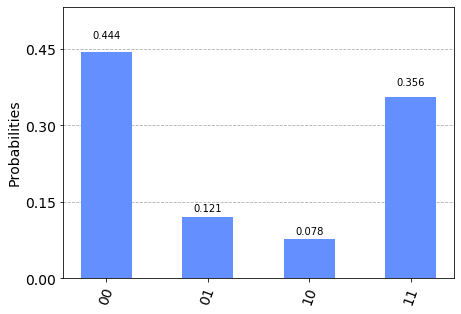

In [24]:
plot_histogram(resultFromQC.get_counts(circuit))

in simulated, only 00, 11 but on real quantum device, we have all

the diff is that simulator simulates perfect, but the real device is siumulating the real quantum errors

01, 10

the simulator simulates a perfect quntum device
the real quantum device takes into consideration 'small quantum errors' which result in getting those 01, 10